In [9]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [10]:
# Gravity and topography data from a profile
grav_data = DataFrame({'dist_prof':[0, 10, 20, 30, 40, 50, 60],
                       'height':[0.0, 0.7, 0.5, 0.2, -0.3, 0.5, 1.0],
                       'gravity':[50000, 50103, 50209, 50275, 50221, 50124, 50028] })
grav_data

,dist_prof,height,gravity
0,0,0.0,50000
1,10,0.7,50103
2,20,0.5,50209
3,30,0.2,50275
4,40,-0.3,50221
5,50,0.5,50124
6,60,1.0,50028


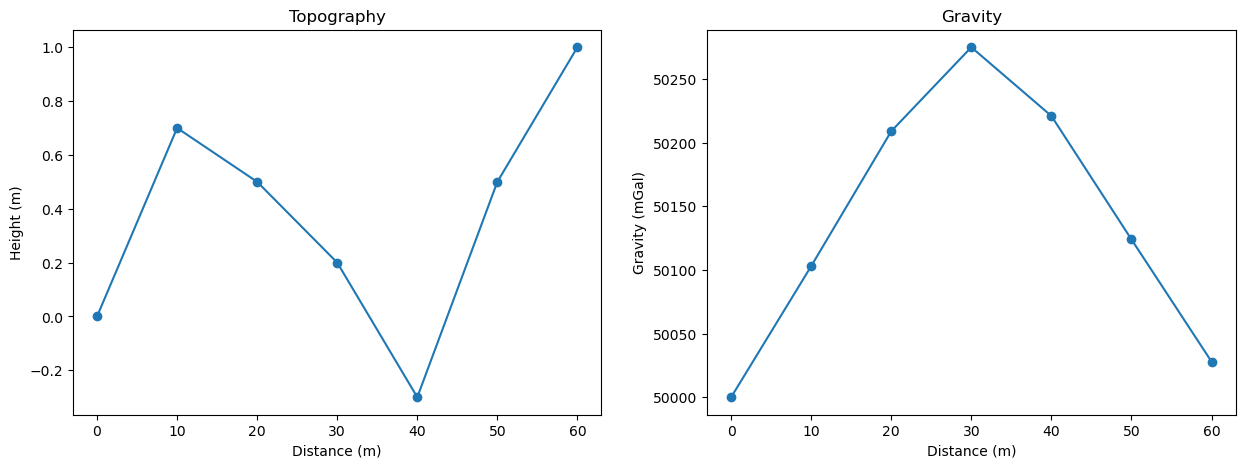

In [11]:
# Plot data
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(15,5))

# Topography
ax1.plot(grav_data['dist_prof'],grav_data['height'],'-o')
ax1.set(xlabel = "Distance (m)",
        ylabel = "Height (m)",
        title = "Topography")

# Gravity
ax2.plot(grav_data['dist_prof'],grav_data['gravity'],'-o')
ax2.set(xlabel = "Distance (m)",
        ylabel = "Gravity (mGal)",
        title = "Gravity");

### Free-air correction
The free-air correction in gu is:
$FAC = 3.086 \cdot h(m) $

In [ ]:
# Calculate free-air correction
grav_data['FAC'] = 3.086 * grav_data['height']
grav_data

### Bouguer correction
The Bouguer correction in gu is:
$BC=[2\pi G \rho_{B} \; h] \; 10^6$

In [ ]:
#Calculation of Bouguer correction:

G = 6.67*(1e-11) # [N*kg-2*m2]

#Bouguer density:
rhoB = 2000 # kg*m-3
grav_data['BC'] = 2 * np.pi * G * rhoB * grav_data['height'] * 1e6
grav_data

### Bouguer gravity anomaly
Local reference = $g_r$ = 50000 gu. The Bouguer gravity anomaly in gu is: \
$\Delta g_B = g_m - g_r - DC + FAC - BC$

In [ ]:
#Bouguer gravity anomaly:
grav_data['BA'] = grav_data['gravity'] - 50000 - grav_data['DC'] + grav_data['FAC'] - grav_data['BC']
grav_data

In [ ]:
#Plot gravity anomaly:
plt.plot(grav_data['dist_prof'][:-1], grav_data['BA'][:-1], '-o', label='Bouguer gravity anomaly')
plt.title('Bouguer gravity anomaly (in gu)')
plt.xlabel('Distance (m)')
plt.ylabel('Gravity anomaly (gu)')